This lab explores the dog licensing data set:  [https://data.cityofnewyork.us/Health/NYC-Dog-Licensing-Dataset/nu7n-tubp/data](https://data.cityofnewyork.us/Health/NYC-Dog-Licensing-Dataset/nu7n-tubp/data)

Filter this data set to only contain entries with the license expiring after today (Aug. 29) before downloading it as a CSV file.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

Read the CSV file into a dataframe called `dogs`, and display the dataframe to make sure it was loaded correctly.

In [4]:
dogs = pd.read_csv("NYC_Dog_Licensing_Dataset.csv")
dogs.head()

RowNumber AnimalName AnimalGender  AnimalBirthMonth  \
0      15470      FOTCH            M              2007   
1      55224    SANGRIA            F              2010   
2      75708   CARLUSHA            M              2003   
3      76211      RUFUS            M              2002   
4      89066     CHEWIE            M              2009   

                       BreedName  Borough  ZipCode LicenseIssuedDate  \
0  Labrador Retriever Crossbreed      NaN    10464        05/31/2015   
1              Italian Greyhound      NaN    10037        04/10/2016   
2                       Shih Tzu      NaN    11235        07/05/2016   
3                 Cocker Spaniel      NaN    10024        07/07/2016   
4               Golden Retriever      NaN    10025        08/30/2016   

  LicenseExpiredDate  Extract Year  
0         08/30/2019          2016  
1         08/30/2019          2016  
2         08/30/2019          2016  
3         08/30/2019          2016  
4         08/30/2019          2016

Two of the columns are dates, so make them into `datetime` objects.

In [5]:
dogs["LicenseIssuedDate"] = pd.to_datetime(dogs["LicenseIssuedDate"])


In [6]:
dogs["LicenseExpiredDate"] = pd.to_datetime(dogs["LicenseExpiredDate"])




Get an over-view of the dataset by calling the `describe()` function.

In [7]:
dogs.describe()

RowNumber  AnimalBirthMonth  Borough       ZipCode  Extract Year
count   56120.000000      56120.000000      0.0  56120.000000  56120.000000
mean    69507.152994       2012.165752      NaN  10655.356700   2017.634979
std     40045.130293         20.427198      NaN    893.995844      0.636891
min         1.000000          1.000000      NaN   6403.000000   2016.000000
25%     31748.250000       2010.000000      NaN  10026.000000   2017.000000
50%     86828.500000       2013.000000      NaN  10462.000000   2018.000000
75%    104383.250000       2015.000000      NaN  11223.000000   2018.000000
max    117371.000000       2018.000000      NaN  98363.000000   2018.000000

1.  Are the summary statistics (mean, standard deviation, min, etc.) meaningful for all of these columns?
2.  Are we missing any data?

Answers:
1. No.  The only column they might be meaningful for is `Extract Year`.
2. Yes, notice we have no borough information, despite it being a column.  Also, some of the columns are missing!

To display columns with non-numeric data, we need to use the following command.

In [8]:
dogs.describe(include = ["O"])

AnimalName AnimalGender BreedName
count       56047        56119     56120
unique       8977            2       305
top         BELLA            M   Unknown
freq          636        30256      5833

What's the most common dog name?

To visualize the distribution of a qualitative or categorica column, we will make a bar chart (as in MAT 128).  Let's do this for the `AnimalGender` column.

First get the value counts.

In [9]:
gender_counts = dogs['AnimalGender'].value_counts()
gender_counts

M    30256
F    25863
Name: AnimalGender, dtype: int64

Are there roughly 50% male and female dogs?

Next we plot the counts:

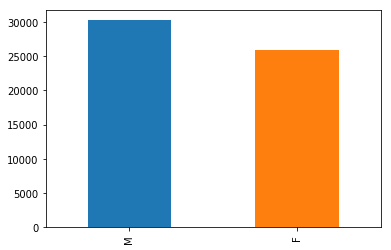

In [10]:
gender_counts.plot.bar()

Add a title and axis labels.  Remember to repeat your original plot.

Text(0,0.5,'# of dogs')

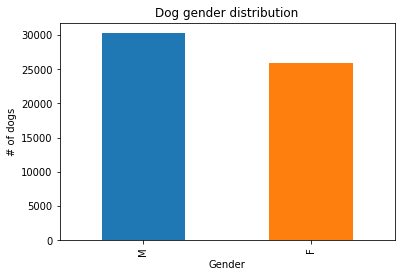

In [11]:
gender_counts.plot.bar()
plt.title("Dog gender distribution")
plt.xlabel("Gender")
plt.ylabel("# of dogs")

Let's plot the distribution of another categorial column, `BreedName`.

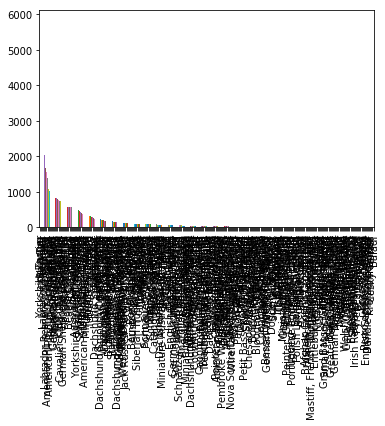

In [12]:
breed_counts = dogs["BreedName"].value_counts()
breed_counts.plot.bar()

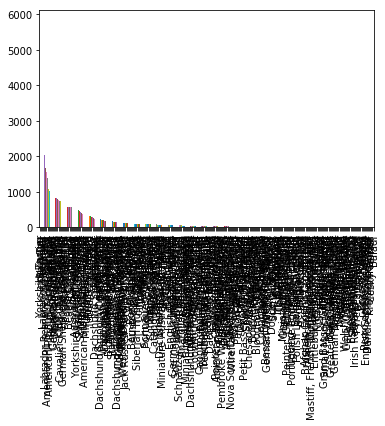

In [16]:
dogs["BreedName"].value_counts().plot.bar()

Is this plot as readable as the gender one?

We can fix this by just plotting the top 10 breeds using filtering.  First, look at the counts to see what the cut-off should be.

In [13]:
breed_counts

Unknown                                 5833
Yorkshire Terrier                       2917
Shih Tzu                                2802
Chihuahua                               2337
Labrador Retriever                      2025
Maltese                                 1675
Labrador Retriever Crossbreed           1563
American Pit Bull Mix / Pit Bull Mix    1379
Havanese                                1067
American Pit Bull Terrier/Pit Bull      1021
Pomeranian                               959
Beagle                                   947
Golden Retriever                         867
Chihuahua Crossbreed                     848
German Shepherd Dog                      821
Shih Tzu Crossbreed                      816
Jack Russell Terrier                     794
French Bulldog                           766
Terrier mix                              739
Cavalier King Charles Spaniel            728
Shiba Inu                                722
Poodle Crossbreed                        666
German She

It looks like 1000 would be a good cut-off.  We can do the filter one of two ways:

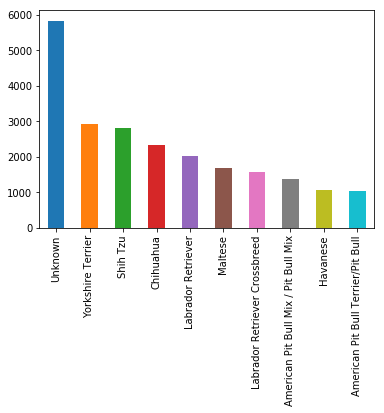

In [14]:
top_filter = breed_counts >=1000
breed_counts[top_filter].plot.bar()

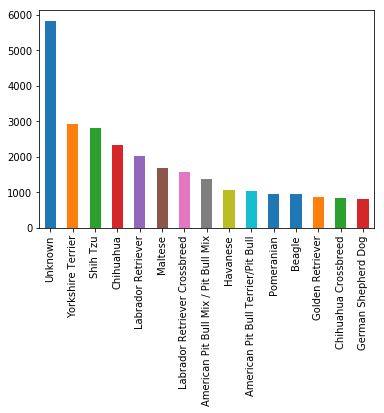

In [15]:
breed_counts.head(15).plot.bar()

In [ ]:
breed_counts[breed_counts >= 1000].plot.bar()

What's the most popular breed of dog?

In Lab 1, we only filtered by a single criteria, but we can filter by multiple criteria using `&` (and) and `|` (or).  For example, if we wanted to count the number of dog licenses issues in August to a Chihuahua:

In [18]:
aug_chihuahua_filter = (dogs["BreedName"] == "Chihuahua") & (dogs["LicenseIssuedDate"].dt.month == 8)
len(dogs[aug_chihuahua_filter])

228

Or if we wanted to count the number of dogs named BELLA or dogs whose license expires in 2020:

In [17]:
bella_2020_filter = (dogs["AnimalName"] == "BELLA") | (dogs["LicenseExpiredDate"].dt.year == 2020)
len(dogs[bella_2020_filter])

15505

In [20]:
dogs_filtered = dogs[bella_2020_filter]

In [21]:
dogs_filtered

RowNumber AnimalName AnimalGender  AnimalBirthMonth  \
193        84424      BELLA            F              2005   
215        84645      BELLA            F              2006   
217        84647      BELLA            F              2006   
290        87307      BELLA            F              2007   
332        88204      BELLA            F              2007   
354        88465      BELLA            F              2004   
499        93382      BELLA            F              2009   
525        94367      BELLA            F              2018   
590        94529      BELLA            F              2018   
665        99599      BELLA            F              2003   
855        89265      BELLA            F              2010   
873        91916      BELLA            F              2016   
964        94771      BELLA            F              2017   
976        94814      BELLA            F              2016   
991        97215      BELLA            F              2016   
1081       84546      BELLA            F              2006   
1149       94867      BELLA            M              2017   
1300       84545      BELLA            F              2010   
1400       95072      BELLA            F              2018   
1585       95145      BELLA            F              2018   
1661       97310      BELLA            F              2011   
1753       84690      BELLA            F              2011   
1879       95858      BELLA            F              2006   
1973       89867      BELLA            F              2016   
2138       99835      BELLA            F              2017   
2315       97447      BELLA            F              2007   
2385       84691      BELLA            F              2011   
2450       95206      BELLA            F              2016   
2454       95469      BELLA            F              2016   
2470       96061      BELLA            F              2017   
...          ...        ...          ...               ...   
54007      59141      BELLA            F              2017   
54076      61227      BELLA            F              2015   
54079      61235      BELLA            F              2017   
54091      61670      BELLA            F              2008   
54141      52711      BELLA            F              2017   
54289      66565      BELLA            F              2014   
54411      69352      BELLA            F              2017   
54461      70662      BELLA            F              2017   
54604      74029      BELLA            F              2013   
54625      74533      BELLA            F              2018   
54680      75848      BELLA            F              2015   
54704      64762      BELLA            F              2006   
54772      82929      BELLA            F              2017   
54773      89137      BELLA            F              2010   
55102      88256      BELLA            F              2017   
55203      90864      BELLA            F              2017   
55370     113750      BELLA            F              2017   
55473      89015      BELLA            F              2016   
55476      98568      BELLA            F              2018   
55512      99592      BELLA            F              2017   
55520      99958      BELLA            F              2018   
55622     111984      BELLA            F              2017   
55660     104529      BELLA            F              2012   
55666     104568      BELLA            F              2015   
55680     104656      BELLA            F              2013   
55759     107410      BELLA            F              2018   
55789     108268      BELLA            F              2018   
56019     116128      BELLA            F              2013   
56050     116550      BELLA            F              2014   
56089      92449      BELLA            F              2012   

                                BreedName  Borough  ZipCode LicenseIssuedDate  \
193                               Unknown      NaN    11414        2018-07-13   


With a partner or by yourself, answer the following questions:

1.  How many dogs are registered in the Lehman zip code (10468)? 

2.  Plot a bar chart of the number of dog licenses in the top 10 zip codes?  Which zip code has the most dog licenses and where is it located (type a zip code into Google maps to see the area)?

3.  How many female Labrador Retreivers are licensed?

4.  How many licenses are due to expired by the end of September?

5. Ask and answer your own question(s) about this dataset.

Challenge question:  Can you find the oldest dog in the dataset?